##  Bank Marketing


**Abstract:** 
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

**Data Set Information:**
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

###  Attribute Information:

####  Bank client data:

 - Age (numeric)
 - Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
 - Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
 - Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',  'illiterate', 'professional.course', 'university.degree', 'unknown')
 - Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
 - Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
 - Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

    
####  Related with the last contact of the current campaign:

 - Contact: contact communication type (categorical:
   'cellular','telephone')
 - Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
   ..., 'nov', 'dec')
 - Day_of_week: last contact day of the week (categorical:
   'mon','tue','wed','thu','fri')
 - Duration: last contact duration, in seconds (numeric). Important
   note: this attribute highly affects the output target (e.g., if
   duration=0 then y='no'). Yet, the duration is not known before a call
   is performed. Also, after the end of the call y is obviously known.
   Thus, this input should only be included for benchmark purposes and
   should be discarded if the intention is to have a realistic
   predictive model.

    
####  Other attributes:

 - Campaign: number of contacts performed during this campaign and for
   this client (numeric, includes last contact)
 - Pdays: number of days that passed by after the client was last
   contacted from a previous campaign (numeric; 999 means client was not
   previously contacted)
 - Previous: number of contacts performed before this campaign and for
   this client (numeric)
 - Poutcome: outcome of the previous marketing campaign (categorical:
   'failure','nonexistent','success')

    
####  Social and economic context attributes
 - Emp.var.rate: employment variation rate - quarterly indicator
   (numeric)
 - Cons.price.idx: consumer price index - monthly indicator (numeric)
 - Cons.conf.idx: consumer confidence index - monthly indicator
   (numeric)
 - Euribor3m: euribor 3 month rate - daily indicator (numeric)
 - Nr.employed: number of employees - quarterly indicator (numeric)

####  Output variable (desired target):

 - y - has the client subscribed a term deposit? (binary: 'yes', 'no')

     
###  Source:

 - Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#


## Import Library

In [1]:
# Importing Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Import Dataset

In [2]:
bank = pd.read_csv('E:/bank-additional/bank-additional-full.csv', sep = ';')

In [3]:
# take a look at the type, number of columns, entries, null values etc..
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Data Cleansing

### Check Data Type

In [5]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

### Check Missing Value

In [6]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Check Outlier

#### Age

In [7]:
#Trying to find some strange values
print('Min age: ', bank['age'].min())
print('Max age: ', bank['age'].max())

Min age:  17
Max age:  98


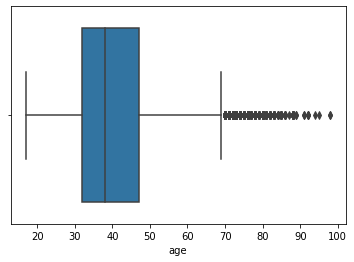

In [8]:
sns.boxplot(bank["age"])

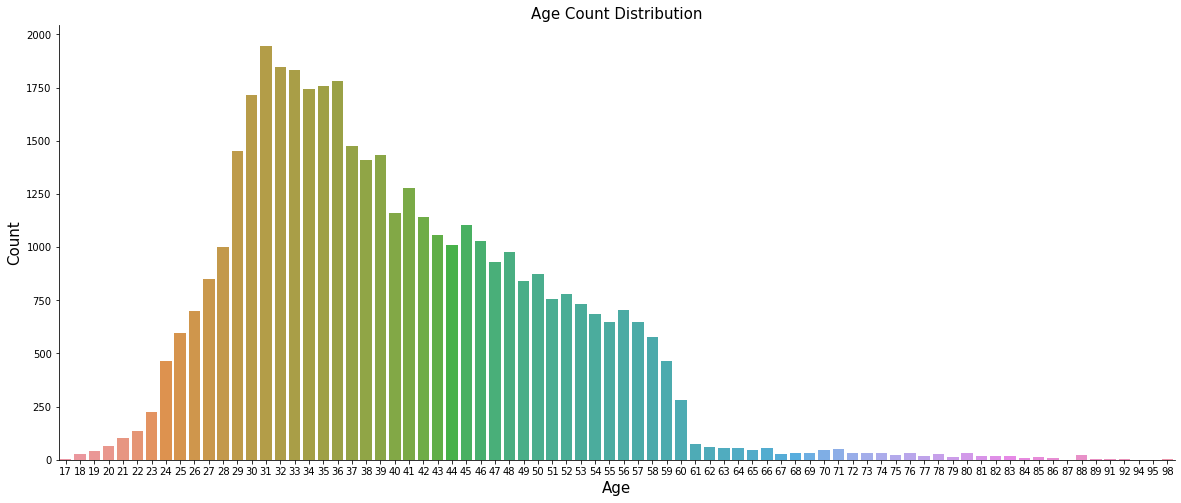

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [10]:
# Quartiles
print('1º Quartile: ', bank['age'].quantile(q = 0.25))
print('2º Quartile: ', bank['age'].quantile(q = 0.50))
print('3º Quartile: ', bank['age'].quantile(q = 0.75))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', bank['age'].quantile(q = 0.75) + 
                      1.5*(bank['age'].quantile(q = 0.75) - bank['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
Ages above:  69.5 are outliers


In [11]:
#function to creat group of ages
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank);

In [12]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,3,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,2,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,3,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,2,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### Duration

In [13]:
#Trying to find some strange values
print('Min duration: ', bank['duration'].min())
print('Max duration: ', bank['duration'].max())

Min duration:  0
Max duration:  4918


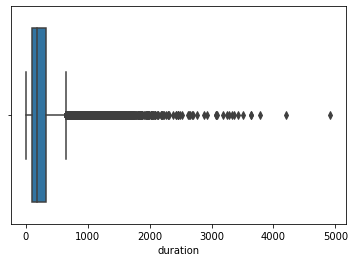

In [14]:
sns.boxplot(bank["duration"])

In [15]:
# Quartiles
print('1º Quartile: ', bank['duration'].quantile(q = 0.25))
print('2º Quartile: ', bank['duration'].quantile(q = 0.50))
print('3º Quartile: ', bank['duration'].quantile(q = 0.75))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('duration above: ', bank['duration'].quantile(q = 0.75) + 
                      1.5*(bank['duration'].quantile(q = 0.75) - bank['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  319.0
duration above:  644.5 are outliers


In [16]:
#function to creat group of duration
def duration(dataframe):
    dataframe.loc[dataframe['duration'] == 0, 'duration'] = 0
    dataframe.loc[(dataframe['duration'] >= 1) & (dataframe['duration'] <= 600), 'duration'] = 1
    dataframe.loc[(dataframe['duration'] >= 601) & (dataframe['duration'] <= 1200), 'duration'] = 2
    dataframe.loc[(dataframe['duration'] >= 1201) & (dataframe['duration'] <= 1800), 'duration'] = 3
    dataframe.loc[(dataframe['duration'] >= 1801) & (dataframe['duration'] <= 2400), 'duration'] = 4
    dataframe.loc[(dataframe['duration'] >= 2401) & (dataframe['duration'] <= 3000), 'duration'] = 5
    dataframe.loc[(dataframe['duration'] >= 3001) & (dataframe['duration'] <= 3600), 'duration'] = 6
    dataframe.loc[(dataframe['duration'] >= 3601), 'duration'] = 7
    
    return dataframe

duration(bank);

In [17]:
bank["duration"].value_counts()

1    37720
2     2951
3      412
4       70
5       16
6       10
7        5
0        4
Name: duration, dtype: int64

#### Campaign

In [18]:
#Trying to find some strange values
print('Min campaign: ', bank['campaign'].max())
print('Max campaign: ', bank['campaign'].min())

Min campaign:  56
Max campaign:  1


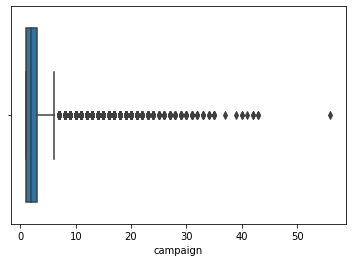

In [19]:
sns.boxplot(bank["campaign"])

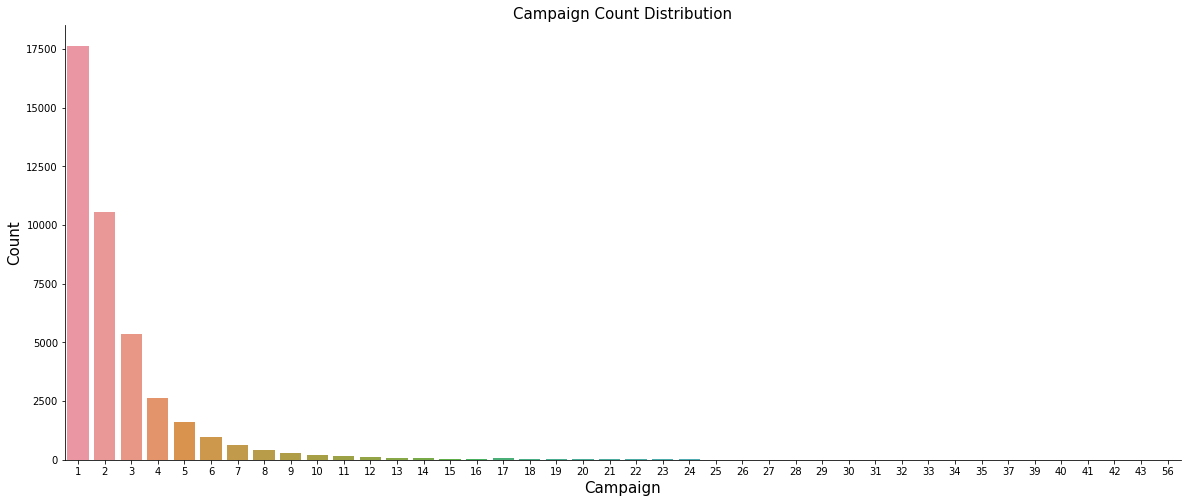

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'campaign', data = bank)
ax.set_xlabel('Campaign', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Campaign Count Distribution', fontsize=15)
sns.despine()

In [21]:
# Quartiles
print('1º Quartile: ', bank['campaign'].quantile(q = 0.25))
print('2º Quartile: ', bank['campaign'].quantile(q = 0.50))
print('3º Quartile: ', bank['campaign'].quantile(q = 0.75))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('campaign above: ', bank['campaign'].quantile(q = 0.75) + 
                      1.5*(bank['campaign'].quantile(q = 0.75) - bank['campaign'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  1.0
2º Quartile:  2.0
3º Quartile:  3.0
campaign above:  6.0 are outliers


In [22]:
bank['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

In [23]:
#function to creat group of duration
def campaign(dataframe):
    dataframe.loc[(dataframe['campaign'] >= 1) & (dataframe['campaign'] <= 5), 'campaign'] = 1
    dataframe.loc[(dataframe['campaign'] >= 6) & (dataframe['campaign'] <= 10), 'campaign'] = 2
    dataframe.loc[(dataframe['campaign'] >= 11) & (dataframe['campaign'] <= 15), 'campaign'] = 3
    dataframe.loc[(dataframe['campaign'] >= 16) & (dataframe['campaign'] <= 20), 'campaign'] = 4
    dataframe.loc[(dataframe['campaign'] >= 21), 'campaign'] = 5
    
    return dataframe

campaign(bank);

In [24]:
bank["campaign"].value_counts()

1    37803
2     2516
3      514
4      198
5      157
Name: campaign, dtype: int64

#### Pdays

In [25]:
#Trying to find some strange values
print('Min pdays: ', bank['pdays'].min())
print('Max pdays: ', bank['pdays'].max())

Min pdays:  0
Max pdays:  999


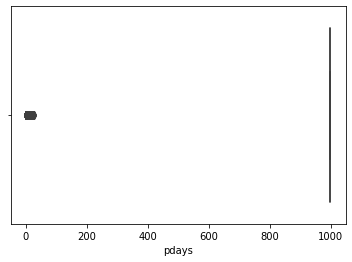

In [26]:
sns.boxplot(bank["pdays"])

In [27]:
# Quartiles
print('1º Quartile: ', bank['pdays'].quantile(q = 0.25))
print('2º Quartile: ', bank['pdays'].quantile(q = 0.50))
print('3º Quartile: ', bank['pdays'].quantile(q = 0.75))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('pdays under: ', bank['pdays'].quantile(q = 0.25) - 
                      1.5*(bank['pdays'].quantile(q = 0.75) - bank['pdays'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  999.0
2º Quartile:  999.0
3º Quartile:  999.0
pdays under:  999.0 are outliers


In [28]:
bank['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [29]:
#function to creat group of duration
def pdays(dataframe):
    dataframe.loc[(dataframe['pdays'] >= 0) & (dataframe['pdays'] <= 7), 'pdays'] = 1
    dataframe.loc[(dataframe['pdays'] >= 8) & (dataframe['pdays'] <= 14), 'pdays'] = 2
    dataframe.loc[(dataframe['pdays'] >= 15) & (dataframe['pdays'] <= 21), 'pdays'] = 3
    dataframe.loc[(dataframe['pdays'] >= 22) & (dataframe['pdays'] <= 28), 'pdays'] = 4
    dataframe.loc[(dataframe['pdays'] >= 29) & (dataframe['pdays'] <= 50), 'pdays'] = 5
    dataframe.loc[dataframe['pdays'] == 999, 'pdays'] = 0
    return dataframe

pdays(bank);

In [30]:
bank["pdays"].value_counts()

0    39673
1     1177
2      276
3       56
4        6
Name: pdays, dtype: int64

#### Previous

In [31]:
#Trying to find some strange values
print('Min previous: ', bank['previous'].min())
print('Max previous: ', bank['previous'].max())

Min previous:  0
Max previous:  7


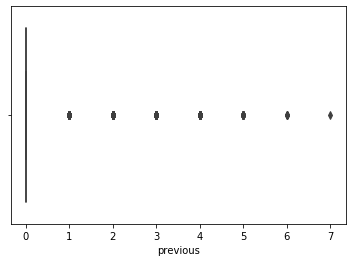

In [32]:
sns.boxplot(bank["previous"])

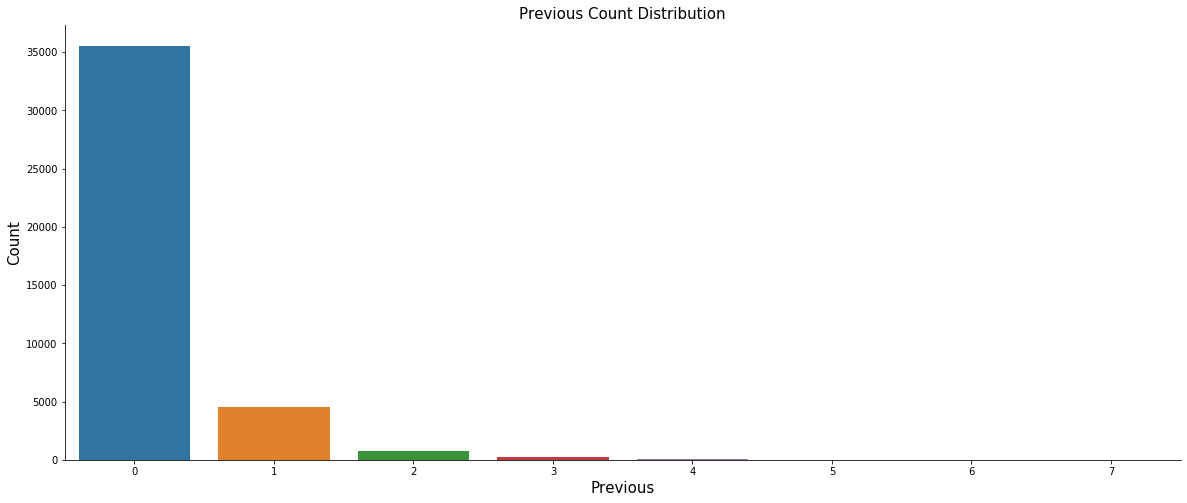

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'previous', data = bank)
ax.set_xlabel('Previous', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Previous Count Distribution', fontsize=15)
sns.despine()

In [34]:
# Quartiles
print('1º Quartile: ', bank['previous'].quantile(q = 0.25))
print('2º Quartile: ', bank['previous'].quantile(q = 0.50))
print('3º Quartile: ', bank['previous'].quantile(q = 0.75))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('previous above: ', bank['previous'].quantile(q = 0.75) + 
                      1.5*(bank['previous'].quantile(q = 0.75) - bank['previous'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  0.0
2º Quartile:  0.0
3º Quartile:  0.0
previous above:  0.0 are outliers


In [35]:
bank['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

#### emp.var.rate

In [36]:
#Trying to find some strange values
print('Min emp.var.rate: ', bank['emp.var.rate'].min())
print('Max emp.var.rate: ', bank['emp.var.rate'].max())

Min emp.var.rate:  -3.4
Max emp.var.rate:  1.4


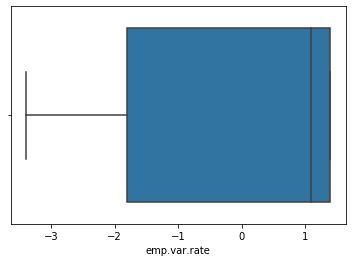

In [37]:
sns.boxplot(bank["emp.var.rate"])

#### cons.price.idx

In [38]:
#Trying to find some strange values
print('Min cons.price.idx: ', bank['cons.price.idx'].min())
print('Max cons.price.idx: ', bank['cons.price.idx'].max())

Min cons.price.idx:  92.20100000000001
Max cons.price.idx:  94.76700000000001


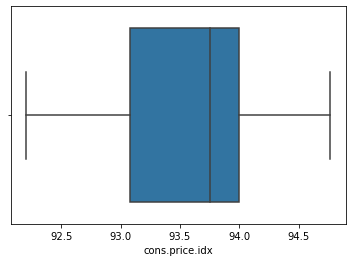

In [39]:
sns.boxplot(bank["cons.price.idx"])

#### euribor3m

In [40]:
#Trying to find some strange values
print('Min euribor3m: ', bank['euribor3m'].min())
print('Max euribor3m: ', bank['euribor3m'].max())

Min euribor3m:  0.634
Max euribor3m:  5.045


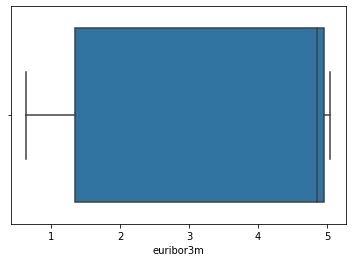

In [41]:
sns.boxplot(bank["euribor3m"])

#### nr.employed

In [42]:
#Trying to find some strange values
print('Min nr.employed: ', bank['nr.employed'].min())
print('Max nr.employed: ', bank['nr.employed'].max())

Min nr.employed:  4963.6
Max nr.employed:  5228.1


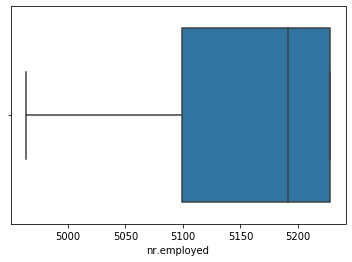

In [43]:
sns.boxplot(bank["nr.employed"])

## Feature Enginering

### Encode Categorical Variable

In [44]:
from sklearn.preprocessing import LabelEncoder

#Separating categorical and numerical columns
target_col = ["y"]
ordinal_col=["age","duration","campaign","pdays","previous"]
num_cols   = ["emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]
cat_cols   = bank.nunique()[bank.nunique() < 13].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col + ordinal_col + num_cols]

#Binary columns with 2 values
bin_cols   = bank.nunique()[bank.nunique() == 2].keys().tolist()

#multinomial columns
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    bank[i] = le.fit_transform(bank[i])
    
#Label encoding for nominal multi value columns
bank=pd.get_dummies(data = bank,columns = multi_cols,drop_first=False)

### Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
bank[num_cols]=ss.fit_transform(bank[num_cols])
bank[num_cols]=ss.fit_transform(bank[num_cols])

### Data Partition

In [47]:
from sklearn.model_selection import train_test_split

##partition data into data training and data testing
train,test = train_test_split(bank,test_size = .20 ,random_state = 111)
 
cols    = [i for i in bank.columns if i not in target_col]
##seperating dependent and independent variables on training and testing data
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

## Smote

In [49]:
from imblearn.over_sampling import SMOTE

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_sample(train_X,train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=cols)
train_smote_Y = pd.DataFrame(data = train_smote_Y,columns=target_col)

Using TensorFlow backend.


In [51]:
train_Y["y"].value_counts()

0    29253
1     3697
Name: y, dtype: int64

In [52]:
train_smote_Y["y"].value_counts()

1    29253
0    29253
Name: y, dtype: int64

## Modeling

### Random Forest

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
param_grid = { 
    'n_estimators': [500,1000],
    'max_features': ['auto'],
    'criterion' :['entropy','gini']
}


In [54]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(train_smote_X, train_smote_Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [55]:
CV_rfc.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 1000}

In [56]:
CV_rfc.cv_results_

{'mean_fit_time': array([111.28221377, 226.77206548,  98.00154106, 181.66662335]),
 'std_fit_time': array([20.97292367, 44.36306302,  6.8404093 ,  3.58291371]),
 'mean_score_time': array([5.36946837, 9.78088037, 4.70314884, 9.74849558]),
 'std_score_time': array([0.56739061, 0.41118626, 0.08036253, 0.56083641]),
 'param_criterion': masked_array(data=['entropy', 'entropy', 'gini', 'gini'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', 'auto'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[500, 1000, 500, 1000],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'entropy',
   'max_features': 'auto',
   'n_estimators': 500},
  {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 1000},
  

In [324]:
CV_rfc.best_score_

0.9351690424913685

### Evaluation

In [325]:
pred=CV_rfc.predict(test_X)

In [326]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(test_Y,pred))

Accuracy for Random Forest on CV data:  0.884316581694586


In [327]:
from sklearn.metrics import confusion_matrix
CF=confusion_matrix(test_Y, pred)
CF

array([[6720,  575],
       [ 378,  565]], dtype=int64)

In [328]:
from sklearn.metrics import classification_report
target_names = ['No','Yes']
print(classification_report(test_Y, pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.95      0.92      0.93      7295
         Yes       0.50      0.60      0.54       943

    accuracy                           0.88      8238
   macro avg       0.72      0.76      0.74      8238
weighted avg       0.90      0.88      0.89      8238



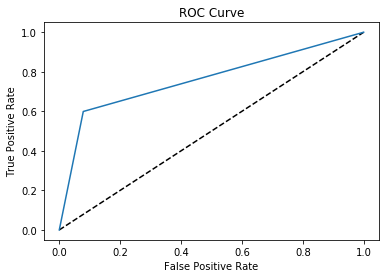

In [329]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_Y, pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [331]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,pred)

0.7601652666703977

### KNN

In [332]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knnc=KNeighborsClassifier()
param_grid = { 
    'n_neighbors': [2,3,4,5,6],
    'metric': ['euclidean','manhatan']
}

In [334]:
CV_knnc = GridSearchCV(estimator=knnc, param_grid=param_grid, cv= 3)
CV_knnc.fit(train_smote_X, train_smote_Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'manhatan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'manhatan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to g

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhatan'],
                         'n_neighbors': [2, 3, 4, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [335]:
CV_knnc.best_params_

{'metric': 'euclidean', 'n_neighbors': 2}

In [336]:
CV_knnc.cv_results_

{'mean_fit_time': array([21.72700047, 21.82335822, 22.08433247, 21.66802692, 21.59583243,
         0.07800444,  0.09633406,  0.08466633,  0.09866627,  0.09300264]),
 'std_fit_time': array([0.36711077, 0.18076957, 0.19388798, 0.49937213, 0.27199031,
        0.00163492, 0.01685833, 0.00262282, 0.00805685, 0.0008179 ]),
 'mean_score_time': array([ 40.679703  ,  46.57733607,  50.29466756, 100.696335  ,
         55.75200192,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ]),
 'std_score_time': array([ 0.55252779,  1.44449265,  1.3547092 , 66.85045379,  1.7716694 ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]),
 'param_metric': masked_array(data=['euclidean', 'euclidean', 'euclidean', 'euclidean',
                    'euclidean', 'manhatan', 'manhatan', 'manhatan',
                    'manhatan', 'manhatan'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_valu

In [337]:
CV_knnc.best_score_

0.9223840289884798

### Evaluation

In [338]:
pred=CV_knnc.predict(test_X)

In [339]:
print("Accuracy for KNN on CV data: ",accuracy_score(test_Y,pred))

Accuracy for KNN on CV data:  0.8800679776644816


In [340]:
from sklearn.metrics import confusion_matrix
CF=confusion_matrix(test_Y, pred)
CF

array([[6857,  438],
       [ 550,  393]], dtype=int64)

In [341]:
from sklearn.metrics import classification_report
target_names = ['No','Yes']
print(classification_report(test_Y, pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.93      0.94      0.93      7295
         Yes       0.47      0.42      0.44       943

    accuracy                           0.88      8238
   macro avg       0.70      0.68      0.69      8238
weighted avg       0.87      0.88      0.88      8238



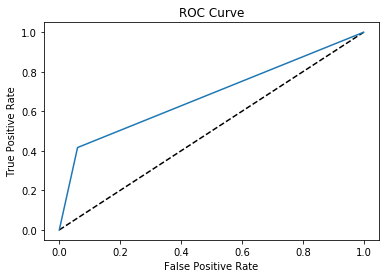

In [342]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_Y, pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [343]:
roc_auc_score(test_Y,pred)

0.6783569565290075

### SVM

In [344]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm=SVC(probability=True)
param_grid = { 
    "C" : [ 0.1, 1],
    "gamma" : [0.1, 1],
    "kernel":["rbf"]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv= 3)
CV_svm.fit(train_smote_X, train_smote_Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
CV_svm.best_params_

In [ ]:
CV_svm.cv_results_

In [ ]:
CV_svm.best_score_

### Evaluation

In [ ]:
pred=CV_svm.predict(test_X)

In [ ]:
print("Accuracy for SVM on CV data: ",accuracy_score(test_Y,pred))

In [ ]:
from sklearn.metrics import confusion_matrix
CF=confusion_matrix(test_Y, pred)
CF

In [ ]:
from sklearn.metrics import classification_report
target_names = ['No','Yes']
print(classification_report(test_Y, pred, target_names=target_names))

In [ ]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_Y, pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,pred)